In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from semisup.tools import mnist
from semisup.tools import mnistm
from semisup.tools import synth
from semisup.tools import svhn
from semisup.tools import synth_signs
from semisup.tools import gtsrb

In [3]:
mnist_test = mnist.get_data('test')
mnistm_test = mnistm.get_data('test')
synth_test = synth.get_data('test')
svhn_test = svhn.get_data('test')
synth_signs_test = synth_signs.get_data('test')
gtsrb_test = gtsrb.get_data('test')

Extracting /Users/Tommy/Development/Promotion/data/mnist//t10k-images-idx3-ubyte.gz
Extracting /Users/Tommy/Development/Promotion/data/mnist//t10k-labels-idx1-ubyte.gz


In [4]:
print mnist_test[0].shape
print mnist_test[1].shape

print mnistm_test[0].shape
print mnistm_test[1].shape

print synth_test[0].shape
print synth_test[1].shape

print svhn_test[0].shape
print svhn_test[1].shape

print synth_signs_test[0].shape
print synth_signs_test[1].shape

print gtsrb_test[0].shape
print gtsrb_test[1].shape

(10000, 28, 28, 1)
(10000,)
(10000, 28, 28, 3)
(10000,)
(9553, 32, 32, 3)
(9553,)
(26032, 32, 32, 3)
(26032,)
(10000, 40, 40, 3)
(10000,)
(12630, 40, 40, 3)
(12630,)


In [61]:
def select_images(all_images, all_labels, selected_labels):
    selected_imgs = []
    for l in selected_labels:
        idx = np.random.choice(np.where(all_labels == l)[0], size=1, replace=False)
        selected_imgs.extend(all_images[idx])

    return np.asarray(selected_imgs)


def get_pairing_samples(first_data, second_data, num_img):
    first_imgs = first_data[0]
    first_labels = first_data[1]
    second_imgs = second_data[0]
    second_labels = second_data[1]
    
    assert set(first_labels) == set(second_labels), 'Label spaces of provided datasets are not the same!'
    
    rand_labels = np.random.choice(list(set(first_labels)), size=num_img, replace=False)
    return select_images(first_imgs, first_labels, rand_labels), select_images(second_imgs, second_labels, rand_labels)


def plot_pairing(paired_samples):
    first_imgs, second_imgs = paired_samples
    assert first_imgs.ndim == 4
    assert second_imgs.ndim == 4
    
    fig, axes = plt.subplots(nrows=2, ncols=first_imgs.shape[0])
    plt.subplots_adjust(hspace=0.05,wspace=0.05)
    for axis in axes.flatten():
        axis.set_visible(False)
    for k, img1 in enumerate(first_imgs):
        img2 = second_imgs[k]
        fig.add_subplot(2, 3, k+1)  
        if img1.shape[2] == 1:
            img1 = np.tile(img1, (1,1,3))
            plt.imshow(img1, cmap='gray')
        else:            
            plt.imshow(img1)
        plt.axis('tight')
        plt.axis('off')
        
        fig.add_subplot(2, 3, k+4) 
        if img2.shape[2] == 1:
            img2 = np.tile(img2, (1,1,3))
            plt.imshow(img2, cmap='gray')
        else:
            plt.imshow(img2)
        plt.axis('tight')
        plt.axis('off')
    return fig

In [6]:
num_display_images = 3
mnist_mnistm_samples = get_pairing_samples(mnist_test, mnistm_test, num_display_images) 
synth_svhn_samples = get_pairing_samples(synth_test, svhn_test, num_display_images) 
svhn_mnist_samples = get_pairing_samples(svhn_test, mnist_test, num_display_images) 
synth_signs_gtsrb_samples = get_pairing_samples(synth_signs_test, gtsrb_test, num_display_images)

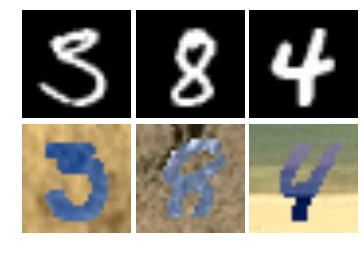

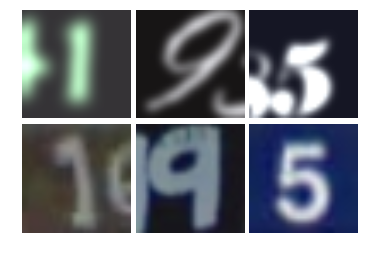

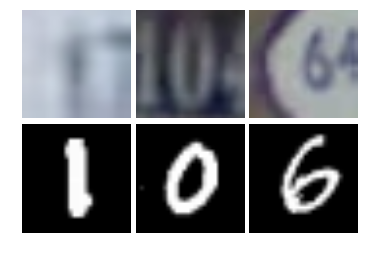

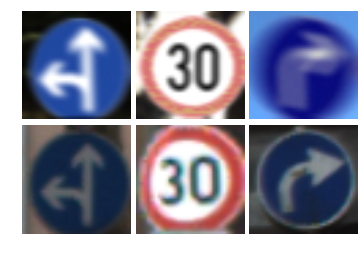

In [62]:
mnist_mnistm_fig = plot_pairing(mnist_mnistm_samples)
synth_svhn_fig = plot_pairing(synth_svhn_samples)
svhn_mnist_fig = plot_pairing(svhn_mnist_samples)
synth_signs_gtsrb_fig = plot_pairing(synth_signs_gtsrb_samples)

In [63]:
mnist_mnistm_fig.savefig('mnist_to_mnistm.png',bbox_inches='tight',pad_inches = 0)
synth_svhn_fig.savefig('synth_to_svhn.png',bbox_inches='tight',pad_inches = 0)
svhn_mnist_fig.savefig('svhn_to_mnist.png',bbox_inches='tight',pad_inches = 0)
synth_signs_gtsrb_fig.savefig('synth_signs_to_gtsrb.png',bbox_inches='tight',pad_inches = 0)